In [1]:
import os
from pySMOKEPostProcessor import pySMOKEpostprocessor as pp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pySMOKEPostProcessor.plots.barplots import plot_bars

In [2]:
kineticFolder = os.path.join("data", "ROPA-01", "kinetics")
resultsFolder = os.path.join("data", "ROPA-01", "Output")

PostProcessor = pp.pySMOKEpostprocessor(kinetic_mechanism = kineticFolder, 
                                     results_folder = resultsFolder, 
                                     verbose=False)

In [3]:
specie = "H2"
upper = 0.0005
lower = 0.0009
nrxns = 15
coefficients, indexes, names = PostProcessor.RateOfProductionAnalysis(specie=specie,
                                                                      ropa_type='region',
                                                                      lower_value = upper, 
                                                                      upper_value = lower, 
                                                                      number_of_reactions = nrxns)
df = pp.coeffs_to_df(coefficients, indexes, names, type = 'ROPA', netflux = True)
df.head()

,index,abs,ROPA-Coeff,Reaction Name
0,27,0.00541716,0.00541716,R28: H2O+H=H2+OH
1,1,0.000965759,0.000965759,R2: H2+O=H+OH
2,52,0.000858545,0.000858545,R53: OH+NH=H2+NO
3,48,0.000465481,-0.000465481,R49: H+NH=H2+N
4,108,0.000407213,0.000407213,R109: H+HNO=H2+NO


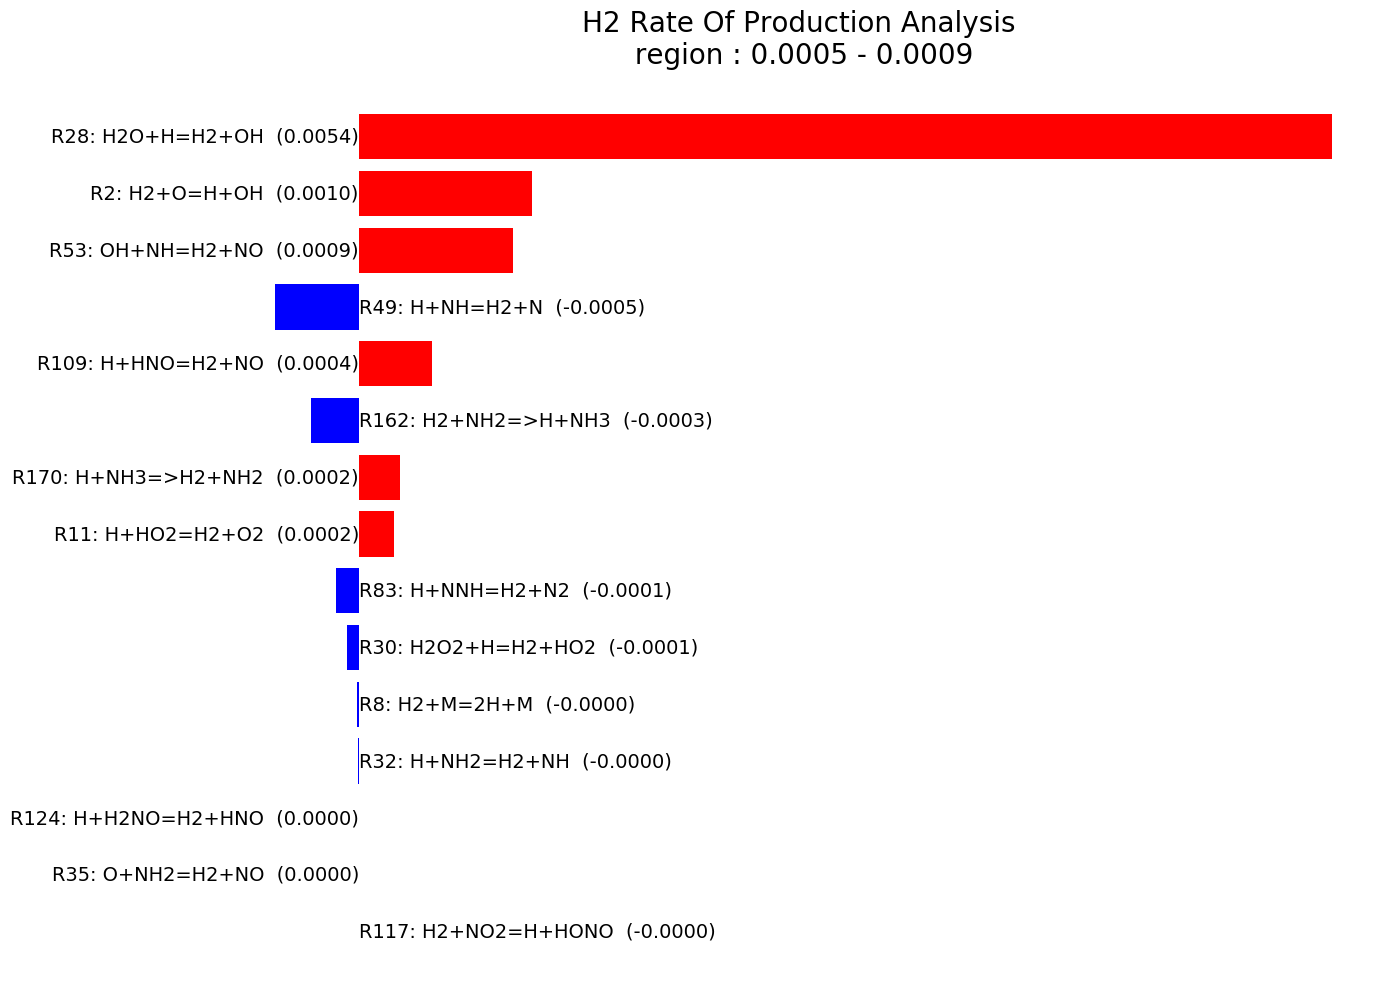

In [4]:
title = "{} Rate Of Production Analysis \n region : {} - {} ".format(specie, upper, lower)
fig = plot_bars(df, 'ROPA', title = title)
plt.show()